In [3]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [4]:
from urllib.request import urlretrieve

In [5]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7e7aa1636e60>)

We can  noew create a Pandas dataframe using the downloaded file, to view and analyze the data.

In [6]:
import pandas as pd

In [7]:
medical_df = pd.read_csv('medical.csv', on_bad_lines="skip")

In [8]:
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [9]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [19]:
!pip install jovian --quiet

In [ ]:
import jovian

jovian.commit(filename = 'machine-learning.ipynb')

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.com/ ):
API KEY:

  ········


[jovian] Error: The current API key is invalid or expired.


[jovian] Please enter your API key ( from https://jovian.com/ ):
API KEY:

In [11]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age
Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [13]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [14]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()


The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isnt a big variation in the number of people of any given age between 18 & 64 in the USA.

### EXERCISE: 
Can you explain why there are over twice as many customers with ages 18 and 19, compared to other ages?

???

### Body Mass Index

Lets look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

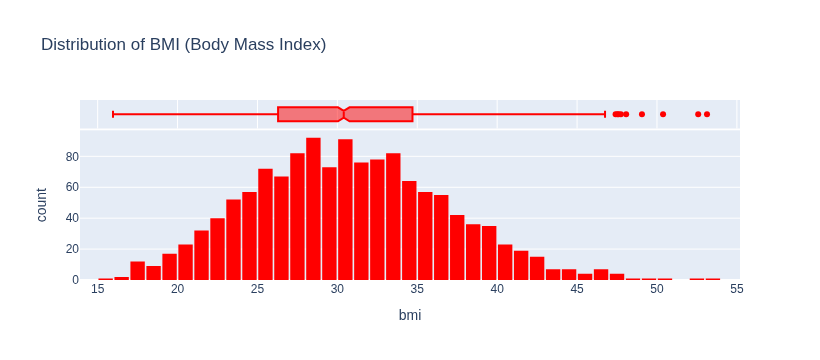

In [15]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

### Charges
Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

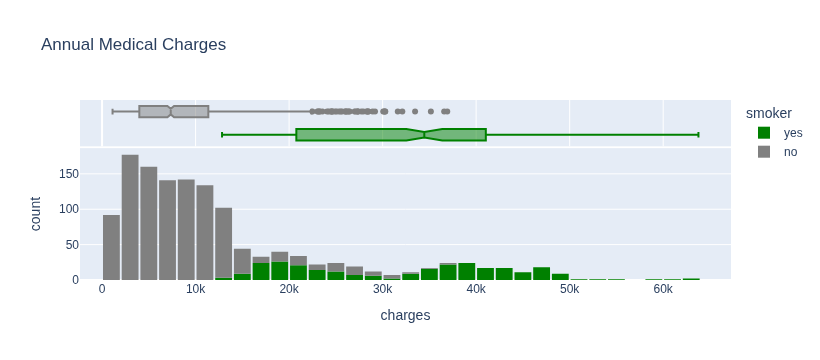

In [17]:
fig = px.histogram(medical_df,
                  x='charges',
                   marginal = 'box',
                   color='smoker',
                   color_discrete_sequence=['green', 'gray'],
                   title= 'Annual Medical Charges'
                  )
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

For most customers, the annual medical charges are under \$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is 7300,themedianforsmokersiscloseto
35,000.

### EXERCISE: 

Visualize the distribution of medical charges in connection with other factors like "sex" and "region". What do you observe?

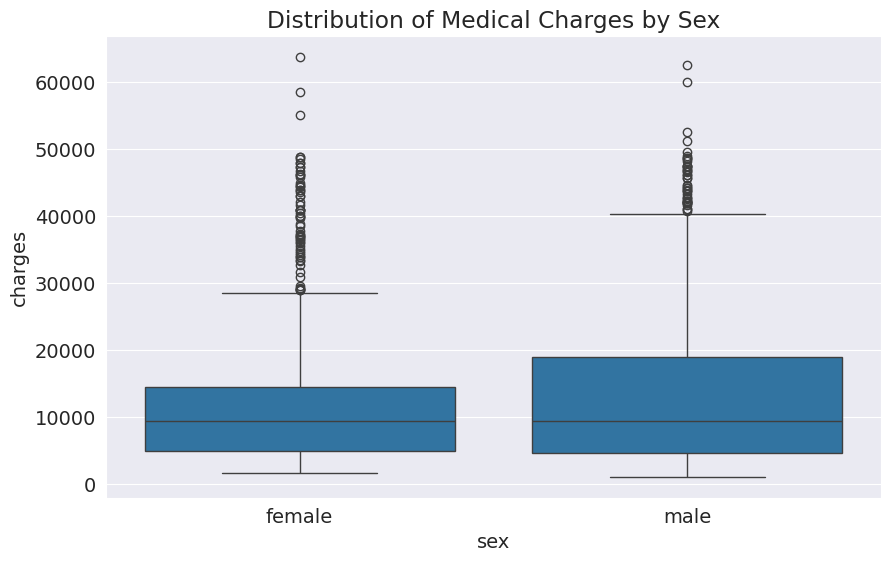

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x="sex", y="charges", data=medical_df)
plt.title("Distribution of Medical Charges by Sex")
plt.show()

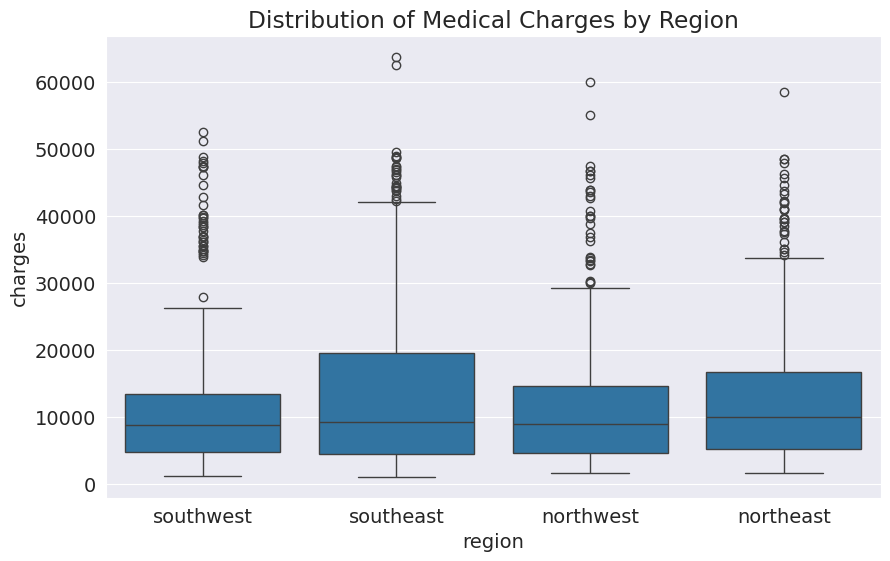

In [19]:
# Distribution of charges by region
plt.figure(figsize=(10,6))
sns.boxplot(x="region", y="charges", data=medical_df)
plt.title("Distribution of Medical Charges by Region")
plt.show()

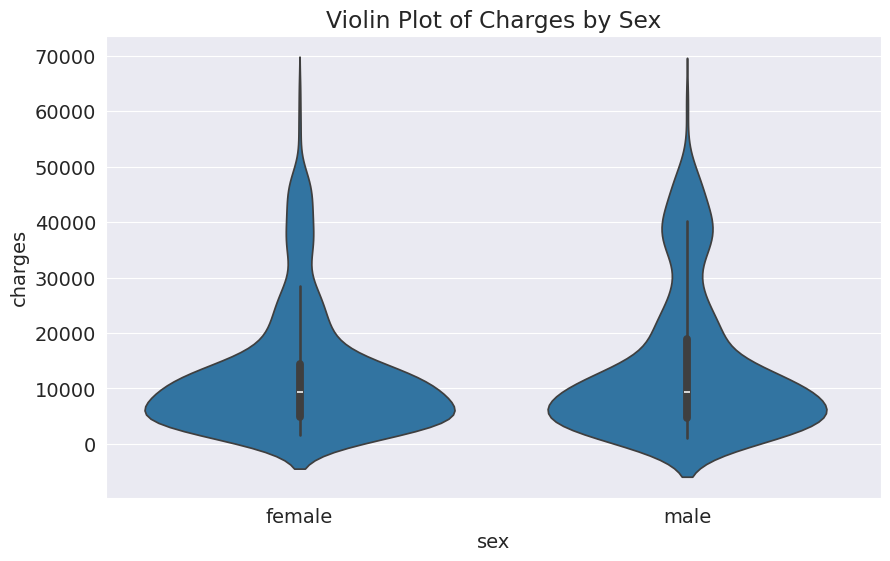

In [20]:
# Alternatively: violin plots to see density
plt.figure(figsize=(10,6))
sns.violinplot(x="sex", y="charges", data=medical_df)
plt.title("Violin Plot of Charges by Sex")
plt.show()

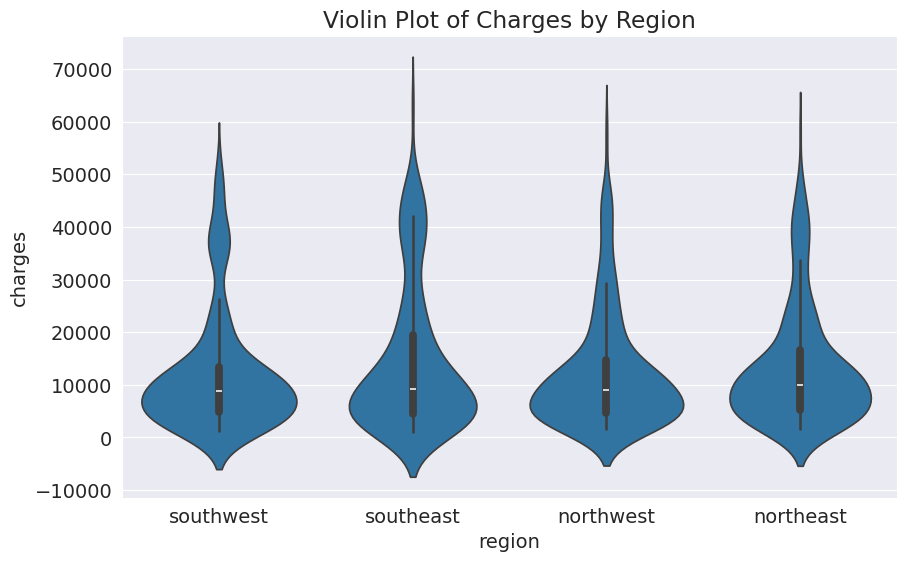

In [21]:
plt.figure(figsize=(10,6))
sns.violinplot(x="region", y="charges", data=medical_df)
plt.title("Violin Plot of Charges by Region")
plt.show()

### Smoker
Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [22]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

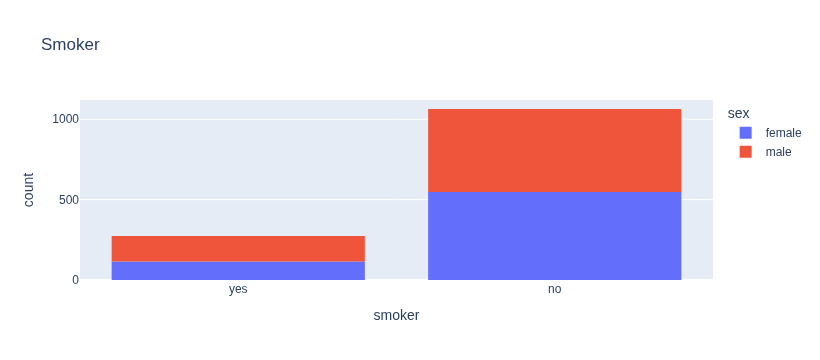

In [23]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

It appears that 20% of customers have reported that they smoke. Can you verify whether this matches the national average, assuming the data was collected in 2010? We can also see that smoking appears a more common habit among males. Can you verify this?

### EXERCISE: 
Visualize the distributions of the "sex", "region" and "children" columns and report your observations.

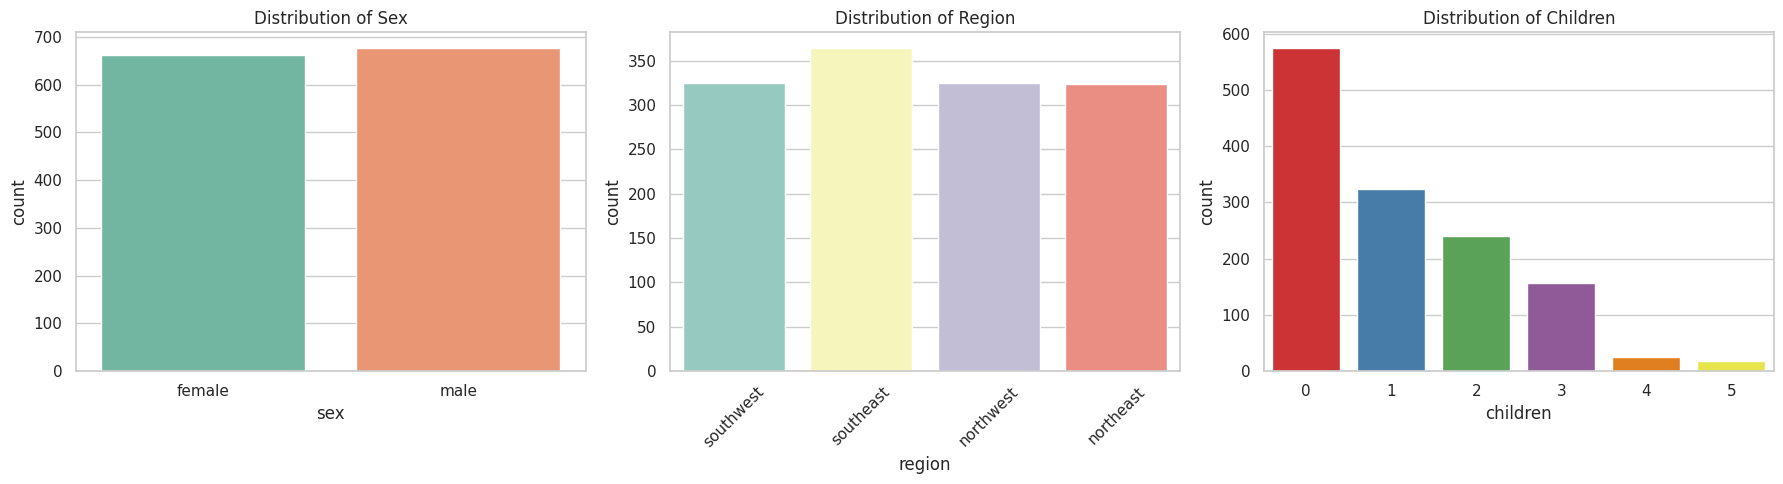

In [25]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution of sex
sns.countplot(x="sex", hue="sex", data=medical_df, ax=axes[0], palette="Set2", legend=False)
axes[0].set_title("Distribution of Sex")

# Distribution of region
sns.countplot(x="region", hue="region", data=medical_df, ax=axes[1], palette="Set3", legend=False)
axes[1].set_title("Distribution of Region")
axes[1].tick_params(axis='x', rotation=45)

# Distribution of children
sns.countplot(x="children", hue="children", data=medical_df, ax=axes[2], palette="Set1", legend=False)
axes[2].set_title("Distribution of Children")

plt.tight_layout()
plt.show()

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

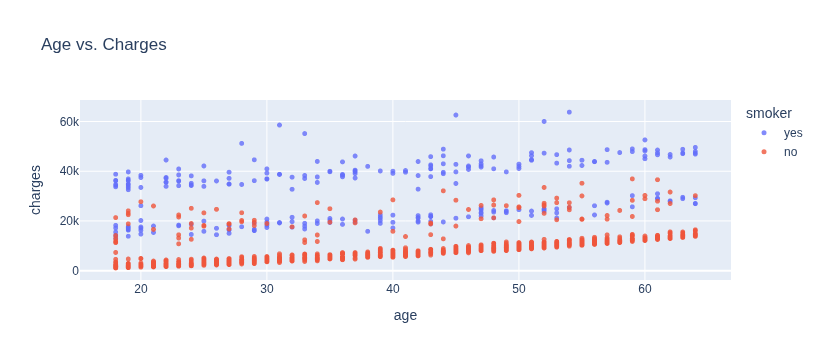

In [26]:
fig  = px.scatter(medical_df,
                 x='age',
                  y='charges',
                  color='smoker',
                  opacity=0.8,
                  hover_data=['sex'],
                  title='Age vs. Charges'
                 )
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

### EXERCISE: 
What other inferences can you draw from the above chart?

???

### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [27]:
fig = px.scatter(medical_df,
                x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges'
                )
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI 

greater than 30.What other insights can you gather from the above graph?



### EXERCISE:
Create some more graphs to visualize how the "charges" column is related to other columns ("children", "sex", "region" and "smoker"). Summarize the insights gathered from these graphs.

Hint: Use violin plots (px.violin) and bar plots (sns.barplot)

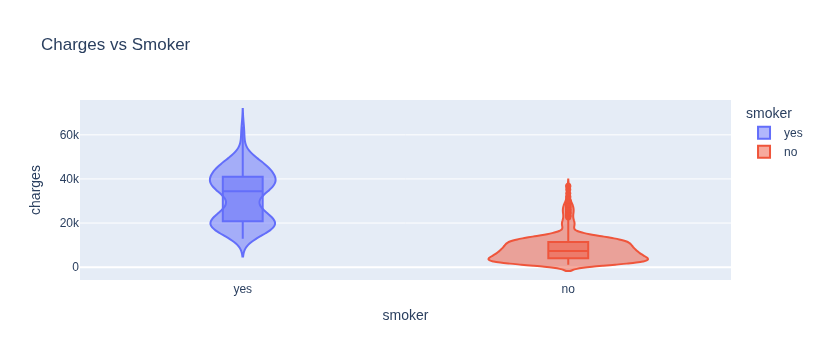

In [33]:
fig1 = px.violin(medical_df, x='children', y="charges", box=True, color="children", title="Charges vs Children")
fig1.show()

fig2 = px.violin(medical_df, x="sex", y="charges", box=True, color="sex", title="Charges vs Sex")
fig2.show()

fig3 = px.violin(medical_df, x="region", y="charges", box=True, color="region", title="Charges vd Region")
fig3.show()

fig4 = px.violin(medical_df, x="smoker", y="charges", box=True, color="smoker", title="Charges vs Smoker")
fig4.show()

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Children
sns.barplot(
    x="children", y="charges", hue="children",
    data=medical_df, ax=axes[0,0], palette="Set2", legend=False, errorbar="sd"
)
axes[0,0].set_title("Average Charges by Number of Children")

# Sex
sns.barplot(
    x="sex", y="charges", hue="sex",
    data=medical_df, ax=axes[0,1], palette="Set3", legend=False, errorbar="sd"
)
axes[0,1].set_title("Average Charges by Sex")

# Region
sns.barplot(
    x="region", y="charges", hue="region",
    data=medical_df, ax=axes[1,0], palette="Set1", legend=False, errorbar="sd"
)
axes[1,0].set_title("Average Charges by Region")
axes[1,0].tick_params(axis='x', rotation=30)

# Smoker
sns.barplot(
    x="smoker", y="charges", hue="smoker",
    data=medical_df, ax=axes[1,1], palette="Set1", legend=False, errorbar="sd"
)
axes[1,1].set_title("Average Charges by Smoker")

plt.tight_layout()
plt.show()


### Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of a Pandas series.

In [40]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [41]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [43]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)




Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">

You can learn more about the mathematical definition and geometric interpretation of correlation here: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

In [45]:
medical_df.corr(numeric_only=True)


age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

The result of `.corr` is called a correlation matrix and is often visualized using a heatmap.

In [47]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix')

## Correlation vs causation fallacy: 
Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features 
𝑋
X and 
𝑌
Y can be correlated if 
𝑋
X causes 
𝑌
Y or if 
𝑌
Y causes 
𝑋
X, or if both are caused independently by some other factor 
𝑍
Z, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that 
𝑋
X are 
𝑌
Y simply appear to be correlated because the sample is too small.

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

### Linear Regression using a Single Feature


We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [49]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

Next, let's visualize the relationship between "age" and "charges"

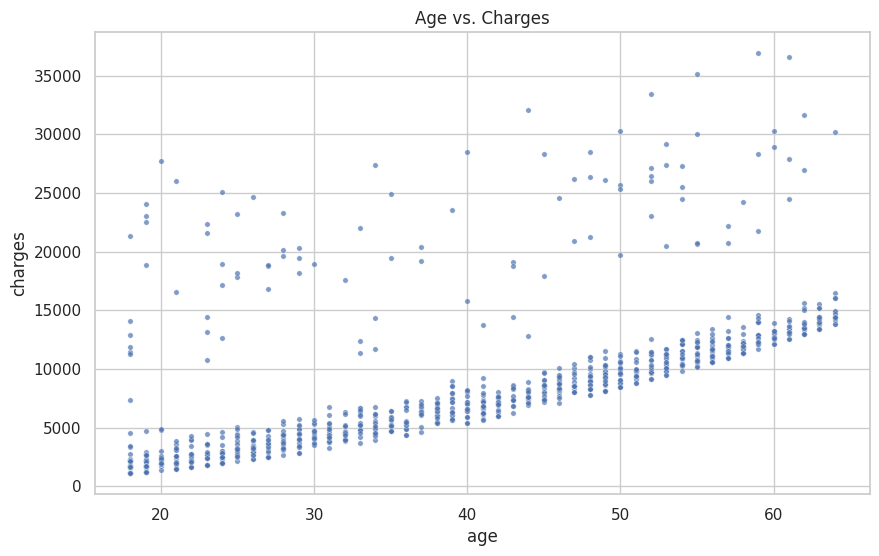

In [50]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

$y = wx + b$

The line is characterized two numbers: $w$ (called "slope") and $b$ (called "intercept"). 

### Model

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assume the following relationship between the two:

$charges = w \times age + b$

We'll try determine $w$ and $b$ for the line that best fits the data. 

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "age" and "charges" as a straight line. 

* The numbers $w$ and $b$ are called the _parameters_ or _weights_ of the model.

* The values in the "age" column of the dataset are called the _inputs_ to the model and the values in the charges column are called "targets". 

Let define a helper function `estimate_charges`, to compute $charges$, given $age$, $w$ and $b$.